### Importing the necessary packages to clean and analyze my data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval 
from collections import Counter

### Here Iimported the data file path

In [2]:
data = pd.read_csv('/Users/jdapeman/Documents/Flatiron/Microsoft_Movie_Analysis/phase_v1_project/zippedData/imdb_top_1000.csv')

In [3]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Renaming the column titles and droping column Poster_Link and Overview
### data columns key:
 
##### Movie_Title: Name of the movie
##### Year_released: Year at which that movie released
##### Certificate_Grade: Certificate earned by that movie
##### Runtime: Total runtime of the movie
##### Genre: Genre of the movie
##### IMDB_Rating: Rating of the movie at IMDB site
##### Meta_score: Score earned by the movie
##### Director: Name of the Director
##### Star1,2,3,4: Name of the Stars
##### Vote_Count: Total number of votes
##### Gross: Money earned by that movie


In [4]:
data.rename(columns={"Series_Title": "Movie_Title", "Released_Year": "Year_released",
"Certificate": "Certificate_Grade", "No_of_Votes": "Vote_Count"}, inplace=True)

In [5]:
data = data.drop('Poster_Link', axis=1) 

In [6]:
data = data.drop('Overview', axis=1) 

In [7]:
data.head()

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        1000 non-null   object 
 1   Year_released      1000 non-null   object 
 2   Certificate_Grade  899 non-null    object 
 3   Runtime            1000 non-null   object 
 4   Genre              1000 non-null   object 
 5   IMDB_Rating        1000 non-null   float64
 6   Meta_score         843 non-null    float64
 7   Director           1000 non-null   object 
 8   Star1              1000 non-null   object 
 9   Star2              1000 non-null   object 
 10  Star3              1000 non-null   object 
 11  Star4              1000 non-null   object 
 12  Vote_Count         1000 non-null   int64  
 13  Gross              831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


### Changing the 'Gross' column datatype from a object to an int64 and NAN to the integer 0.

In [9]:
data['Gross'] = data['Gross'].str.replace(',', '')

In [10]:
data['Gross'] = data['Gross'].replace(np.nan, 0)

In [11]:
data['Gross'] = data['Gross'].astype('int64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        1000 non-null   object 
 1   Year_released      1000 non-null   object 
 2   Certificate_Grade  899 non-null    object 
 3   Runtime            1000 non-null   object 
 4   Genre              1000 non-null   object 
 5   IMDB_Rating        1000 non-null   float64
 6   Meta_score         843 non-null    float64
 7   Director           1000 non-null   object 
 8   Star1              1000 non-null   object 
 9   Star2              1000 non-null   object 
 10  Star3              1000 non-null   object 
 11  Star4              1000 non-null   object 
 12  Vote_Count         1000 non-null   int64  
 13  Gross              1000 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 109.5+ KB


In [13]:
data

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0


### Here I replaced all 'Gross' values equaling zero with the median gross. I chose the median as a relplacement
### because there were only 169 0 values and imputating the median is more robust than replacing 0 values with 
### the mean.

In [14]:
data['Gross'].median()

10702751.5

In [15]:
data.loc[data['Gross'] == 0, 'Gross'] = 10702752

In [16]:
data.sort_values(by=['Movie_Title'], inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 754 to 211
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        1000 non-null   object 
 1   Year_released      1000 non-null   object 
 2   Certificate_Grade  899 non-null    object 
 3   Runtime            1000 non-null   object 
 4   Genre              1000 non-null   object 
 5   IMDB_Rating        1000 non-null   float64
 6   Meta_score         843 non-null    float64
 7   Director           1000 non-null   object 
 8   Star1              1000 non-null   object 
 9   Star2              1000 non-null   object 
 10  Star3              1000 non-null   object 
 11  Star4              1000 non-null   object 
 12  Vote_Count         1000 non-null   int64  
 13  Gross              1000 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 117.2+ KB


In [18]:
data

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,Gross
754,(500) Days of Summer,2009,UA,95 min,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,32391374
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
215,12 Years a Slave,2013,A,134 min,"Biography, Drama, History",8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,56671993
84,1917,2019,R,119 min,"Drama, Thriller, War",8.3,78.0,Sam Mendes,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,425844,159227644
114,2001: A Space Odyssey,1968,U,149 min,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,603517,56954992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Zootopia,2016,U,108 min,"Animation, Adventure, Comedy",8.0,78.0,Byron Howard,Rich Moore,Jared Bush,Ginnifer Goodwin,Jason Bateman,434143,341268248
860,Zulu,1964,U,138 min,"Drama, History, War",7.7,77.0,Cy Endfield,Stanley Baker,Jack Hawkins,Ulla Jacobsson,James Booth,35999,10702752
772,Zwartboek,2006,R,145 min,"Drama, Thriller, War",7.7,71.0,Paul Verhoeven,Carice van Houten,Sebastian Koch,Thom Hoffman,Halina Reijn,72643,4398392
708,À bout de souffle,1960,U,90 min,"Crime, Drama",7.8,NaN,Jean-Luc Godard,Jean-Paul Belmondo,Jean Seberg,Daniel Boulanger,Henri-Jacques Huet,73251,336705


### I imported data from movie_budgets.csv specifically for the 'production_budget' column

In [19]:
df_budgets = pd.read_csv('/Users/jdapeman/Documents/Flatiron/Microsoft_Movie_Analysis/phase_v1_project/zippedData/tn.movie_budgets.csv')

In [20]:
df_budgets.sort_values(by=['movie'], inplace=True)

In [21]:
df_budgets.rename(columns = {'movie' : 'Movie_Title'}, inplace=True)

In [22]:
df_budgets

,id,release_date,Movie_Title,production_budget,domestic_gross,worldwide_gross
5115,16,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0
3954,55,"Jul 17, 2009",(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060"
4253,54,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422"
3447,48,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616"
3262,63,"Mar 31, 1999",10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950"
...,...,...,...,...,...,...
1958,59,"Sep 15, 2017",mother!,"$30,000,000","$17,800,004","$42,531,076"
697,98,"Aug 9, 2002",xXx,"$70,000,000","$141,930,000","$267,200,000"
514,15,"Jan 20, 2017",xXx: Return of Xander Cage,"$85,000,000","$44,898,413","$345,033,359"
4756,57,"Apr 15, 2008",Ã l\'intÃ©rieur,"$3,000,000",$0,"$895,932"


### Math operations cannot be done on the prodcution_budget, domestic_gross, or worldwide_gross columns because
### they are strings. Here I stripped them of $ and thier commas, allowing me to change the datatype from a 
### string to an int

In [23]:
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(r'$', '')
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(r',', '')
df_budgets['production_budget'] = df_budgets['production_budget'].astype(int)

/var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/ipykernel_6053/96240506.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(r'$', '')


In [24]:
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(r'$', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(r',', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype(int)

/var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/ipykernel_6053/3544728917.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(r'$', '')


In [25]:
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(r'$', '')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(r',', '')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype(int)

/var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/ipykernel_6053/1886919089.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(r'$', '')


In [26]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 5115 to 2701
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   Movie_Title        5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 316.2+ KB


In [27]:
df_budgets

,id,release_date,Movie_Title,production_budget,domestic_gross,worldwide_gross
5115,16,"Nov 20, 2015",#Horror,1500000,0,0
3954,55,"Jul 17, 2009",(500) Days of Summer,7500000,32425665,34439060
4253,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422
3447,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616
3262,63,"Mar 31, 1999",10 Things I Hate About You,13000000,38177966,60413950
...,...,...,...,...,...,...
1958,59,"Sep 15, 2017",mother!,30000000,17800004,42531076
697,98,"Aug 9, 2002",xXx,70000000,141930000,267200000
514,15,"Jan 20, 2017",xXx: Return of Xander Cage,85000000,44898413,345033359
4756,57,"Apr 15, 2008",Ã l\'intÃ©rieur,3000000,0,895932


### I combined the two dataframes, data and df_budgets. For my perameters I chose inner, left_on, and right_on 
### 'Movie_title' because I wanted to keep the titles from both data sets

In [28]:
profit_per_cat_data = pd.merge(data, df_budgets, left_on = 'Movie_Title', right_on = 'Movie_Title', how = 'inner')

In [29]:
profit_per_cat_data

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,Gross,id,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,2009,UA,95 min,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,32391374,55,"Jul 17, 2009",7500000,32425665,34439060
1,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,36,"Apr 13, 1957",340000,0,0
2,12 Years a Slave,2013,A,134 min,"Biography, Drama, History",8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,56671993,18,"Oct 18, 2013",20000000,56671993,181025343
3,2001: A Space Odyssey,1968,U,149 min,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,603517,56954992,27,"Apr 2, 1968",10500000,59936321,71928046
4,21 Grams,2003,UA,124 min,"Crime, Drama, Thriller",7.6,70.0,Alejandro G. Iñárritu,Sean Penn,Benicio Del Toro,Naomi Watts,Danny Huston,224545,16290476,13,"Nov 21, 2003",20000000,16248701,59667625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Zodiac,2007,UA,157 min,"Crime, Drama, Mystery",7.7,78.0,David Fincher,Jake Gyllenhaal,Robert Downey Jr.,Mark Ruffalo,Anthony Edwards,466080,33080084,21,"Mar 2, 2007",85000000,33080084,83080084
517,Zombieland,2009,A,88 min,"Adventure, Comedy, Fantasy",7.6,73.0,Ruben Fleischer,Jesse Eisenberg,Emma Stone,Woody Harrelson,Abigail Breslin,520041,75590286,67,"Oct 2, 2009",23600000,75590286,102236596
518,Zootopia,2016,U,108 min,"Animation, Adventure, Comedy",8.0,78.0,Byron Howard,Rich Moore,Jared Bush,Ginnifer Goodwin,Jason Bateman,434143,341268248,57,"Mar 4, 2016",150000000,341268248,1019429616
519,Zulu,1964,U,138 min,"Drama, History, War",7.7,77.0,Cy Endfield,Stanley Baker,Jack Hawkins,Ulla Jacobsson,James Booth,35999,10702752,82,"Dec 31, 2013",16000000,0,1844228


In [30]:
profit_per_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 0 to 520
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        521 non-null    object 
 1   Year_released      521 non-null    object 
 2   Certificate_Grade  511 non-null    object 
 3   Runtime            521 non-null    object 
 4   Genre              521 non-null    object 
 5   IMDB_Rating        521 non-null    float64
 6   Meta_score         503 non-null    float64
 7   Director           521 non-null    object 
 8   Star1              521 non-null    object 
 9   Star2              521 non-null    object 
 10  Star3              521 non-null    object 
 11  Star4              521 non-null    object 
 12  Vote_Count         521 non-null    int64  
 13  Gross              521 non-null    int64  
 14  id                 521 non-null    int64  
 15  release_date       521 non-null    object 
 16  production_budget  521 non

### dropping rows with zero value for 'domestic_gross'. There are five zero values being filtered out.

In [31]:
profit_per_cat_data = profit_per_cat_data[profit_per_cat_data['domestic_gross'] > 1]

In [32]:
profit_per_cat_data

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,Gross,id,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,2009,UA,95 min,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,32391374,55,"Jul 17, 2009",7500000,32425665,34439060
2,12 Years a Slave,2013,A,134 min,"Biography, Drama, History",8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,56671993,18,"Oct 18, 2013",20000000,56671993,181025343
3,2001: A Space Odyssey,1968,U,149 min,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,603517,56954992,27,"Apr 2, 1968",10500000,59936321,71928046
4,21 Grams,2003,UA,124 min,"Crime, Drama, Thriller",7.6,70.0,Alejandro G. Iñárritu,Sean Penn,Benicio Del Toro,Naomi Watts,Danny Huston,224545,16290476,13,"Nov 21, 2003",20000000,16248701,59667625
5,25th Hour,2002,R,135 min,Drama,7.6,68.0,Spike Lee,Edward Norton,Barry Pepper,Philip Seymour Hoffman,Rosario Dawson,169708,13060843,29,"Dec 19, 2002",4500000,13084595,25344490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Young Frankenstein,1974,A,106 min,Comedy,8.0,80.0,Mel Brooks,Gene Wilder,Madeline Kahn,Marty Feldman,Peter Boyle,143359,86300000,84,"Dec 15, 1974",2800000,86300000,86300000
516,Zodiac,2007,UA,157 min,"Crime, Drama, Mystery",7.7,78.0,David Fincher,Jake Gyllenhaal,Robert Downey Jr.,Mark Ruffalo,Anthony Edwards,466080,33080084,21,"Mar 2, 2007",85000000,33080084,83080084
517,Zombieland,2009,A,88 min,"Adventure, Comedy, Fantasy",7.6,73.0,Ruben Fleischer,Jesse Eisenberg,Emma Stone,Woody Harrelson,Abigail Breslin,520041,75590286,67,"Oct 2, 2009",23600000,75590286,102236596
518,Zootopia,2016,U,108 min,"Animation, Adventure, Comedy",8.0,78.0,Byron Howard,Rich Moore,Jared Bush,Ginnifer Goodwin,Jason Bateman,434143,341268248,57,"Mar 4, 2016",150000000,341268248,1019429616


In [33]:
### I created a column titled 'Total_Domestic_Gross', consisting of the average of the 'Gross' and 
### 'domestic_gross' columns

In [34]:
profit_per_cat_data['Total_Domestic_Gross'] = (profit_per_cat_data['Gross'] + profit_per_cat_data['domestic_gross'])/2

/var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/ipykernel_6053/3372512078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_per_cat_data['Total_Domestic_Gross'] = (profit_per_cat_data['Gross'] + profit_per_cat_data['domestic_gross'])/2


In [35]:
profit_per_cat_data

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,Gross,id,release_date,production_budget,domestic_gross,worldwide_gross,Total_Domestic_Gross
0,(500) Days of Summer,2009,UA,95 min,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,32391374,55,"Jul 17, 2009",7500000,32425665,34439060,32408519.5
2,12 Years a Slave,2013,A,134 min,"Biography, Drama, History",8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,56671993,18,"Oct 18, 2013",20000000,56671993,181025343,56671993.0
3,2001: A Space Odyssey,1968,U,149 min,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,603517,56954992,27,"Apr 2, 1968",10500000,59936321,71928046,58445656.5
4,21 Grams,2003,UA,124 min,"Crime, Drama, Thriller",7.6,70.0,Alejandro G. Iñárritu,Sean Penn,Benicio Del Toro,Naomi Watts,Danny Huston,224545,16290476,13,"Nov 21, 2003",20000000,16248701,59667625,16269588.5
5,25th Hour,2002,R,135 min,Drama,7.6,68.0,Spike Lee,Edward Norton,Barry Pepper,Philip Seymour Hoffman,Rosario Dawson,169708,13060843,29,"Dec 19, 2002",4500000,13084595,25344490,13072719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Young Frankenstein,1974,A,106 min,Comedy,8.0,80.0,Mel Brooks,Gene Wilder,Madeline Kahn,Marty Feldman,Peter Boyle,143359,86300000,84,"Dec 15, 1974",2800000,86300000,86300000,86300000.0
516,Zodiac,2007,UA,157 min,"Crime, Drama, Mystery",7.7,78.0,David Fincher,Jake Gyllenhaal,Robert Downey Jr.,Mark Ruffalo,Anthony Edwards,466080,33080084,21,"Mar 2, 2007",85000000,33080084,83080084,33080084.0
517,Zombieland,2009,A,88 min,"Adventure, Comedy, Fantasy",7.6,73.0,Ruben Fleischer,Jesse Eisenberg,Emma Stone,Woody Harrelson,Abigail Breslin,520041,75590286,67,"Oct 2, 2009",23600000,75590286,102236596,75590286.0
518,Zootopia,2016,U,108 min,"Animation, Adventure, Comedy",8.0,78.0,Byron Howard,Rich Moore,Jared Bush,Ginnifer Goodwin,Jason Bateman,434143,341268248,57,"Mar 4, 2016",150000000,341268248,1019429616,341268248.0


dopping the Gross, domestic_gross, and id columns

In [36]:
profit_per_cat_data = profit_per_cat_data.drop('Gross', axis=1)

In [37]:
profit_per_cat_data = profit_per_cat_data.drop('domestic_gross', axis=1)

In [38]:
profit_per_cat_data = profit_per_cat_data.drop('id', axis=1)

In [39]:
profit_per_cat_data

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,release_date,production_budget,worldwide_gross,Total_Domestic_Gross
0,(500) Days of Summer,2009,UA,95 min,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,"Jul 17, 2009",7500000,34439060,32408519.5
2,12 Years a Slave,2013,A,134 min,"Biography, Drama, History",8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,"Oct 18, 2013",20000000,181025343,56671993.0
3,2001: A Space Odyssey,1968,U,149 min,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,603517,"Apr 2, 1968",10500000,71928046,58445656.5
4,21 Grams,2003,UA,124 min,"Crime, Drama, Thriller",7.6,70.0,Alejandro G. Iñárritu,Sean Penn,Benicio Del Toro,Naomi Watts,Danny Huston,224545,"Nov 21, 2003",20000000,59667625,16269588.5
5,25th Hour,2002,R,135 min,Drama,7.6,68.0,Spike Lee,Edward Norton,Barry Pepper,Philip Seymour Hoffman,Rosario Dawson,169708,"Dec 19, 2002",4500000,25344490,13072719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Young Frankenstein,1974,A,106 min,Comedy,8.0,80.0,Mel Brooks,Gene Wilder,Madeline Kahn,Marty Feldman,Peter Boyle,143359,"Dec 15, 1974",2800000,86300000,86300000.0
516,Zodiac,2007,UA,157 min,"Crime, Drama, Mystery",7.7,78.0,David Fincher,Jake Gyllenhaal,Robert Downey Jr.,Mark Ruffalo,Anthony Edwards,466080,"Mar 2, 2007",85000000,83080084,33080084.0
517,Zombieland,2009,A,88 min,"Adventure, Comedy, Fantasy",7.6,73.0,Ruben Fleischer,Jesse Eisenberg,Emma Stone,Woody Harrelson,Abigail Breslin,520041,"Oct 2, 2009",23600000,102236596,75590286.0
518,Zootopia,2016,U,108 min,"Animation, Adventure, Comedy",8.0,78.0,Byron Howard,Rich Moore,Jared Bush,Ginnifer Goodwin,Jason Bateman,434143,"Mar 4, 2016",150000000,1019429616,341268248.0


now we can make a profit column

In [40]:
profit_per_cat_data['Profit'] = profit_per_cat_data['worldwide_gross'] - profit_per_cat_data['production_budget']

In [41]:
profit_per_cat_data['Genre'] = profit_per_cat_data['Genre'].str.strip('()').str.split(',')

In [42]:
profit_per_cat_data['Genre'][0]

['Comedy', ' Drama', ' Romance']

In [43]:
profit_per_cat_data['Genre'] = profit_per_cat_data['Genre'].apply(literal_eval)

ValueError: malformed node or string: ['Comedy', ' Drama', ' Romance']

In [45]:
profit_per_cat_data = profit_per_cat_data.explode('Genre')

In [46]:
profit_per_cat_data

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,release_date,production_budget,worldwide_gross,Total_Domestic_Gross,Profit
0,(500) Days of Summer,2009,UA,95 min,Comedy,7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,"Jul 17, 2009",7500000,34439060,32408519.5,26939060
0,(500) Days of Summer,2009,UA,95 min,Drama,7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,"Jul 17, 2009",7500000,34439060,32408519.5,26939060
0,(500) Days of Summer,2009,UA,95 min,Romance,7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,"Jul 17, 2009",7500000,34439060,32408519.5,26939060
2,12 Years a Slave,2013,A,134 min,Biography,8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,"Oct 18, 2013",20000000,181025343,56671993.0,161025343
2,12 Years a Slave,2013,A,134 min,Drama,8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,"Oct 18, 2013",20000000,181025343,56671993.0,161025343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Zootopia,2016,U,108 min,Adventure,8.0,78.0,Byron Howard,Rich Moore,Jared Bush,Ginnifer Goodwin,Jason Bateman,434143,"Mar 4, 2016",150000000,1019429616,341268248.0,869429616
518,Zootopia,2016,U,108 min,Comedy,8.0,78.0,Byron Howard,Rich Moore,Jared Bush,Ginnifer Goodwin,Jason Bateman,434143,"Mar 4, 2016",150000000,1019429616,341268248.0,869429616
520,Zwartboek,2006,R,145 min,Drama,7.7,71.0,Paul Verhoeven,Carice van Houten,Sebastian Koch,Thom Hoffman,Halina Reijn,72643,"Apr 6, 2007",22000000,27238354,4398462.0,5238354
520,Zwartboek,2006,R,145 min,Thriller,7.7,71.0,Paul Verhoeven,Carice van Houten,Sebastian Koch,Thom Hoffman,Halina Reijn,72643,"Apr 6, 2007",22000000,27238354,4398462.0,5238354


In [47]:
profit_per_cat_data['Genre'].value_counts()

 Drama        208
Drama         138
Action        106
 Adventure     89
 Thriller      73
Comedy         60
 Sci-Fi        58
Biography      56
 Romance       54
Adventure      49
Crime          48
 Comedy        47
 Crime         42
Animation      41
 Mystery       38
 Fantasy       31
 Family        30
 History       29
 War           21
 Sport         15
 Music         12
Horror         12
 Biography     11
 Action        10
 Western       10
 Horror         9
 Musical        7
 Film-Noir      4
Mystery         3
Western         2
Family          1
Name: Genre, dtype: int64

In [49]:
profit_per_cat_data['Genre'] = profit_per_cat_data['Genre'].str.strip()

In [50]:
profit_per_cat_data['Genre'].value_counts()

Drama        346
Adventure    138
Action       116
Comedy       107
Crime         90
Thriller      73
Biography     67
Sci-Fi        58
Romance       54
Mystery       41
Animation     41
Fantasy       31
Family        31
History       29
Horror        21
War           21
Sport         15
Music         12
Western       12
Musical        7
Film-Noir      4
Name: Genre, dtype: int64

1.) what genre is most profitable

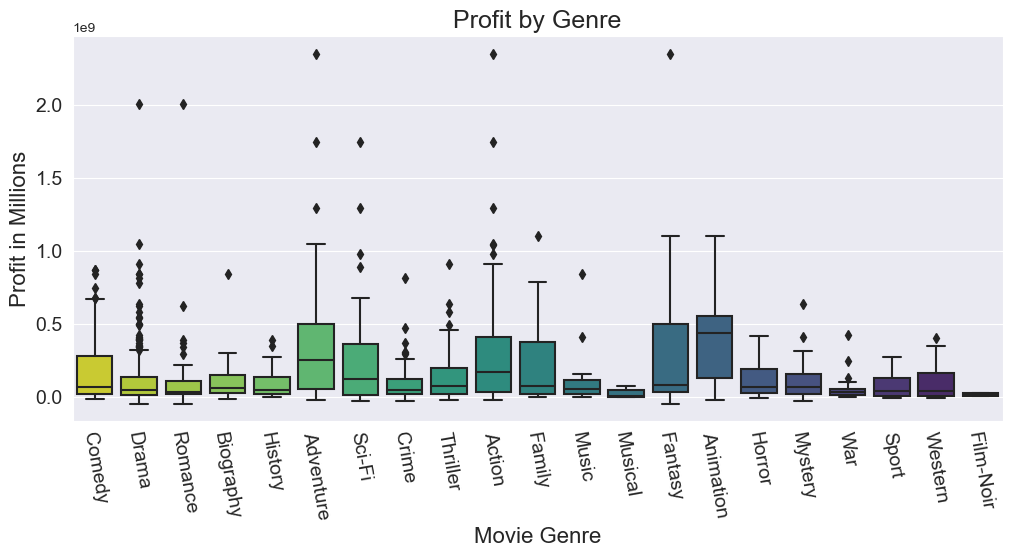

In [51]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='Genre', y='Profit', data=profit_per_cat_data, palette='viridis_r')
plt.xticks(rotation=-80)
plt.ylabel('Profit in Millions', fontsize=16)
plt.xlabel('Movie Genre', fontsize = 16)
plt.title('Profit by Genre', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

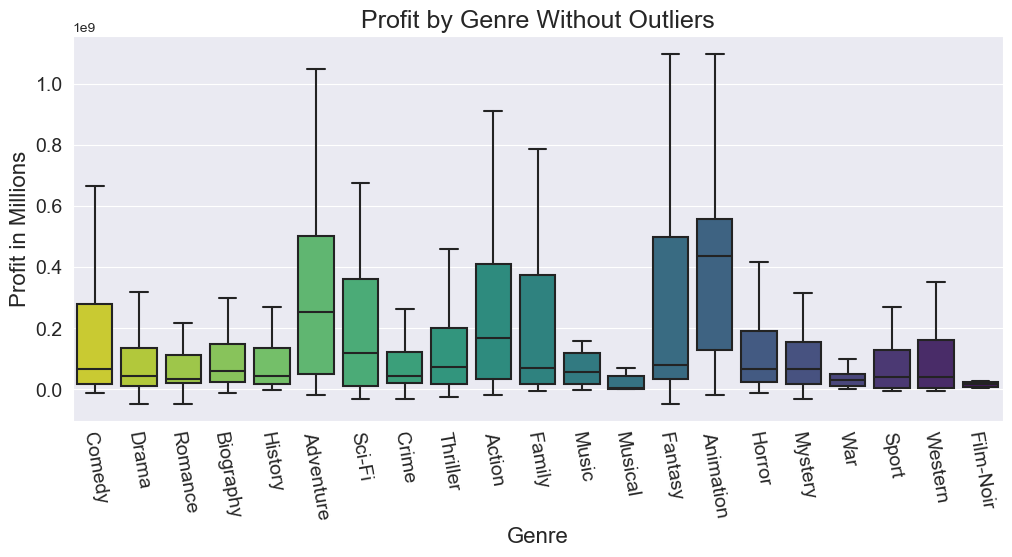

In [52]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='Genre', y='Profit', data=profit_per_cat_data, showfliers=False, palette='viridis_r')
plt.xticks(rotation=-80)
plt.ylabel('Profit in Millions', fontsize=16)
plt.xlabel('Genre', fontsize = 16)
plt.title('Profit by Genre Without Outliers', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

1.) what genre is most popular

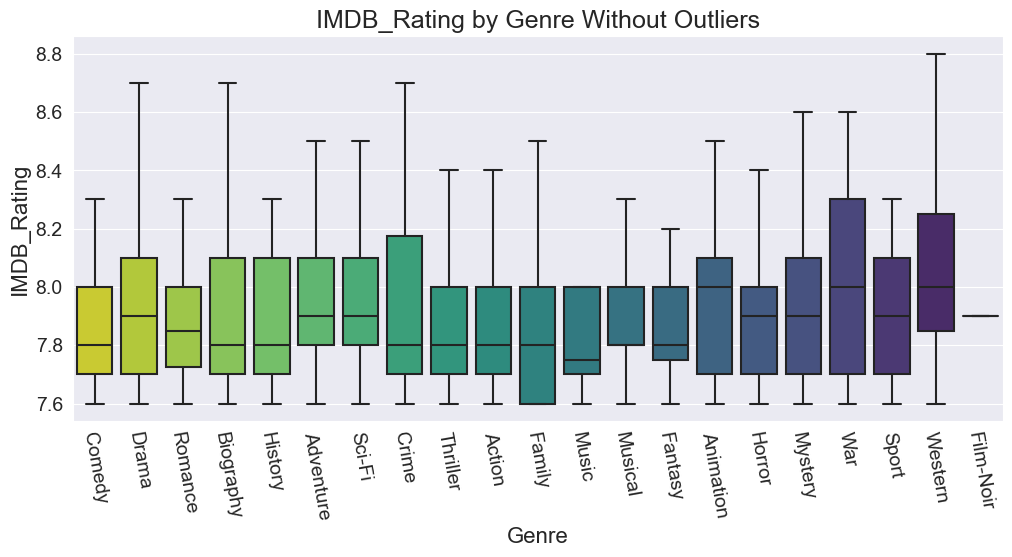

In [53]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='Genre', y='IMDB_Rating', data=profit_per_cat_data, showfliers=False, palette='viridis_r')
plt.xticks(rotation=-80)
plt.ylabel('IMDB_Rating', fontsize=16)
plt.xlabel('Genre', fontsize = 16)
plt.title('IMDB_Rating by Genre Without Outliers', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

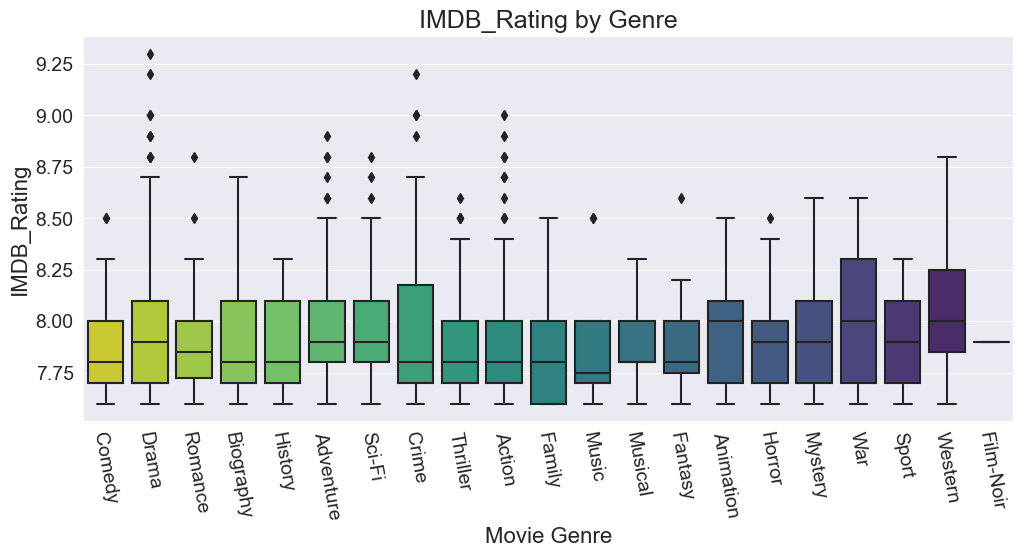

In [54]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='Genre', y='IMDB_Rating', data=profit_per_cat_data, palette='viridis_r')
plt.xticks(rotation=-80)
plt.ylabel('IMDB_Rating', fontsize=16)
plt.xlabel('Movie Genre', fontsize = 16)
plt.title('IMDB_Rating by Genre', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

1.) is there a correlation between spending and profitability? 

In [ ]:
correlation_data = profit_per_cat_data[['Profit', 'production_budget']].copy()

In [ ]:
sns.scatterplot(data = correlation_data, x = 'production_budget', y = 'Profit')

In [ ]:
correlation_data.corr()

2.) what stars generate the most profit?

In [ ]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=profit_per_cat_data.groupby([x]).sum().reset_index()
    d=s.sort_values(['Profit'],ascending=False)[:10]
    axs[ax].bar(d[x],d['Profit'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

2.) what directors make the most profit of over a billion $

In [68]:
profit_per_cat_data['Profit'].describe()

count    1.314000e+03
mean     1.757187e+08
std      2.706061e+08
min     -4.647775e+07
25%      1.902122e+07
50%      6.734718e+07
75%      2.255008e+08
max      2.351345e+09
Name: Profit, dtype: float64

In [69]:
top_profit_directors = profit_per_cat_data[profit_per_cat_data['Profit'] > 1000000000]
top_profit_directors

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,release_date,production_budget,worldwide_gross,Total_Domestic_Gross,Profit
37,Avatar,2009,UA,162 min,Action,7.8,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,"Dec 18, 2009",425000000,2776345279,760507625.0,2351345279
37,Avatar,2009,UA,162 min,Adventure,7.8,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,"Dec 18, 2009",425000000,2776345279,760507625.0,2351345279
37,Avatar,2009,UA,162 min,Fantasy,7.8,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,"Dec 18, 2009",425000000,2776345279,760507625.0,2351345279
38,Avengers: Infinity War,2018,UA,149 min,Action,8.4,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,"Apr 27, 2018",300000000,2048134200,678815482.0,1748134200
38,Avengers: Infinity War,2018,UA,149 min,Adventure,8.4,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,"Apr 27, 2018",300000000,2048134200,678815482.0,1748134200
38,Avengers: Infinity War,2018,UA,149 min,Sci-Fi,8.4,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,"Apr 27, 2018",300000000,2048134200,678815482.0,1748134200
47,Beauty and the Beast,1991,G,84 min,Animation,8.0,95.0,Gary Trousdale,Kirk Wise,Paige O'Hara,Robby Benson,Jesse Corti,417178,"Mar 17, 2017",160000000,1259199706,361490892.5,1099199706
47,Beauty and the Beast,1991,G,84 min,Family,8.0,95.0,Gary Trousdale,Kirk Wise,Paige O'Hara,Robby Benson,Jesse Corti,417178,"Mar 17, 2017",160000000,1259199706,361490892.5,1099199706
47,Beauty and the Beast,1991,G,84 min,Fantasy,8.0,95.0,Gary Trousdale,Kirk Wise,Paige O'Hara,Robby Benson,Jesse Corti,417178,"Mar 17, 2017",160000000,1259199706,361490892.5,1099199706
207,Incredibles 2,2018,UA,118 min,Animation,7.6,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,"Jun 15, 2018",200000000,1242520711,608581744.0,1042520711


/var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/ipykernel_6053/971089416.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99)` for the same effect.

  sns.barplot(x = 'Director', y = 'Profit', data = top_profit_directors,
/var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/ipykernel_6053/971089416.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99)` for the same effect.

  sns.pointplot(x = 'Director', y = 'Profit', data = top_profit_directors,


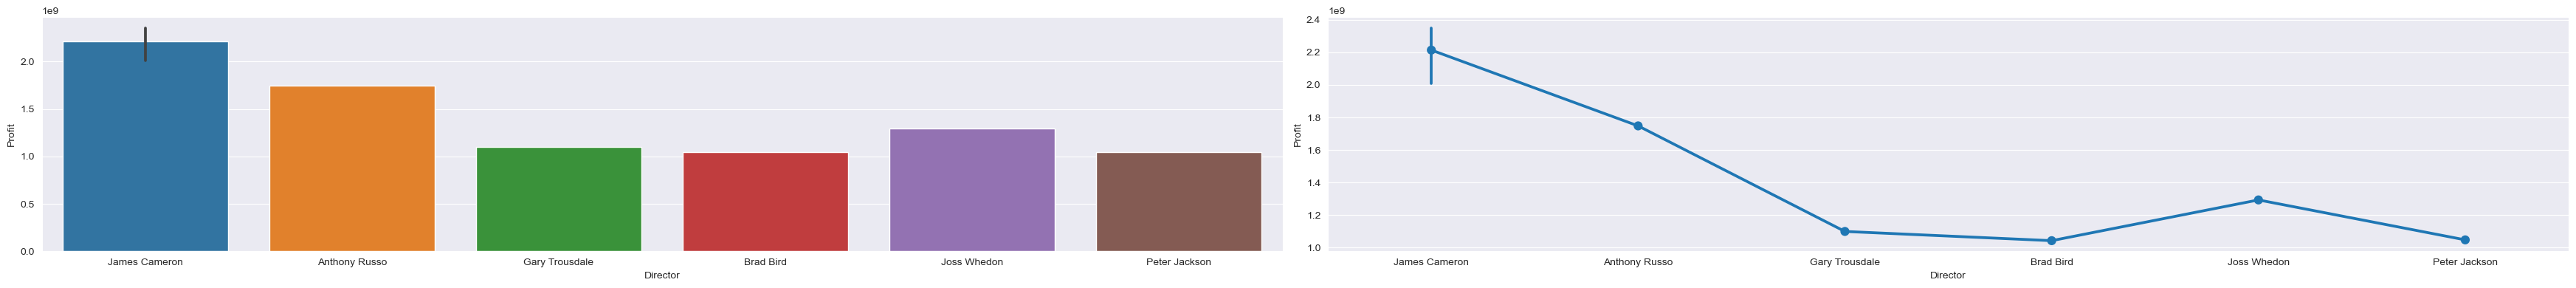

In [70]:
fig, ax = plt.subplots(1,2, figsize = (35,4))
sns.barplot(x = 'Director', y = 'Profit', data = top_profit_directors, 
            ci = 99.99, ax = ax[0])

sns.pointplot(x = 'Director', y = 'Profit', data = top_profit_directors,
              ci = 99.99, ax = ax[1])

plt.tight_layout()
plt.show()

3.) is there an oversaturation of one kind of movie made witin the 21st century?

In [55]:
profit_per_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 0 to 520
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Movie_Title           1314 non-null   object 
 1   Year_released         1314 non-null   object 
 2   Certificate_Grade     1295 non-null   object 
 3   Runtime               1314 non-null   object 
 4   Genre                 1314 non-null   object 
 5   IMDB_Rating           1314 non-null   float64
 6   Meta_score            1277 non-null   float64
 7   Director              1314 non-null   object 
 8   Star1                 1314 non-null   object 
 9   Star2                 1314 non-null   object 
 10  Star3                 1314 non-null   object 
 11  Star4                 1314 non-null   object 
 12  Vote_Count            1314 non-null   int64  
 13  release_date          1314 non-null   object 
 14  production_budget     1314 non-null   int64  
 15  worldwide_gross       

In [56]:
profit_per_cat_data[profit_per_cat_data['Year_released'] == 'PG'].value_counts()

Movie_Title  Year_released  Certificate_Grade  Runtime  Genre      IMDB_Rating  Meta_score  Director    Star1      Star2        Star3        Star4        Vote_Count  release_date  production_budget  worldwide_gross  Total_Domestic_Gross  Profit   
Apollo 13    PG             U                  140 min  Adventure  7.6          77.0        Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise  269197      Jun 30, 1995  65000000           335802271        173805350.0           270802271    1
                                                        Drama      7.6          77.0        Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise  269197      Jun 30, 1995  65000000           335802271        173805350.0           270802271    1
                                                        History    7.6          77.0        Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise  269197      Jun 30, 1995  65000000           335802271        173805350.0           27080227

In [64]:
profit_per_cat_data.loc[profit_per_cat_data['Year_released'] == 'PG', 'Year_released'] = 1995

In [65]:
profit_per_cat_data['Year_released'] = profit_per_cat_data['Year_released'].astype(int)

In [66]:
saturation_data = profit_per_cat_data[profit_per_cat_data['Year_released'] > 1999]

In [67]:
saturation_data_v2 = saturation_data[['Year_released', 'Genre']].copy()

In [61]:
saturation_data_v2

,Year_released,Genre
0,2009,Comedy
0,2009,Drama
0,2009,Romance
2,2013,Biography
2,2013,Drama
...,...,...
518,2016,Adventure
518,2016,Comedy
520,2006,Drama
520,2006,Thriller


In [62]:
saturation_data_v3 = saturation_data_v2['Genre'].value_counts()

<Axes: >

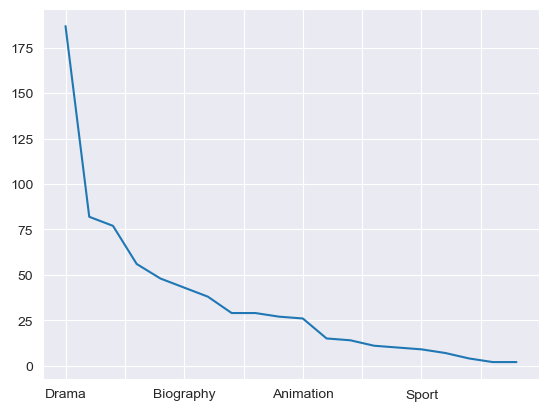

In [63]:
saturation_data_v3.plot()